## AutoRegressive Model



In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Read data from Excel file
data = pd.read_excel('cleaned_data.xlsx')

# Set lag order
lag_order = 2

# Create lagged variables for the temperature
for lag in range(1, lag_order + 1):
    data[f'temperature_lag{lag}'] = data['temperature'].shift(lag)

# Remove rows with NaN resulting from lagged variables
data = data.dropna()

# Set up the model
X = data[['temperature_lag1', 'temperature_lag2']]
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = data['temperature']

# Fit the autoregression model
model = sm.OLS(y, X)
results = model.fit()

# Print regression summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.142e+06
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:32:12   Log-Likelihood:                 1749.0
No. Observations:                1390   AIC:                            -3492.
Df Residuals:                    1387   BIC:                            -3476.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0006      0.019  

## Scatter Plot


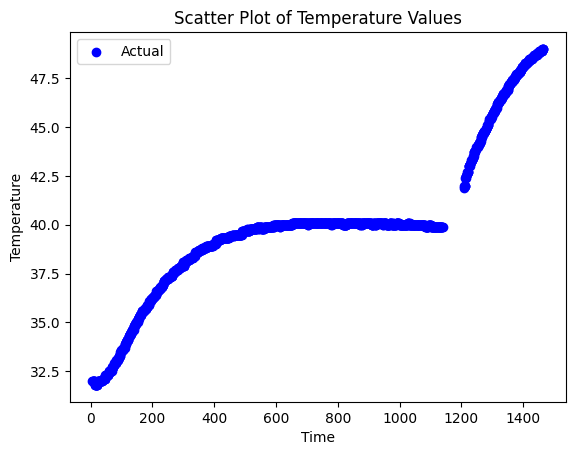

In [ ]:
import matplotlib.pyplot as plt

data = pd.read_excel('cleaned_data.xlsx')

# Assuming 'Time' is the independent variable and 'Temperature' is the dependent variable
plt.scatter(data['time'], data['temperature'], label='Actual', color='blue')

plt.title('Scatter Plot of Temperature Values')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

## Plot Initial Model

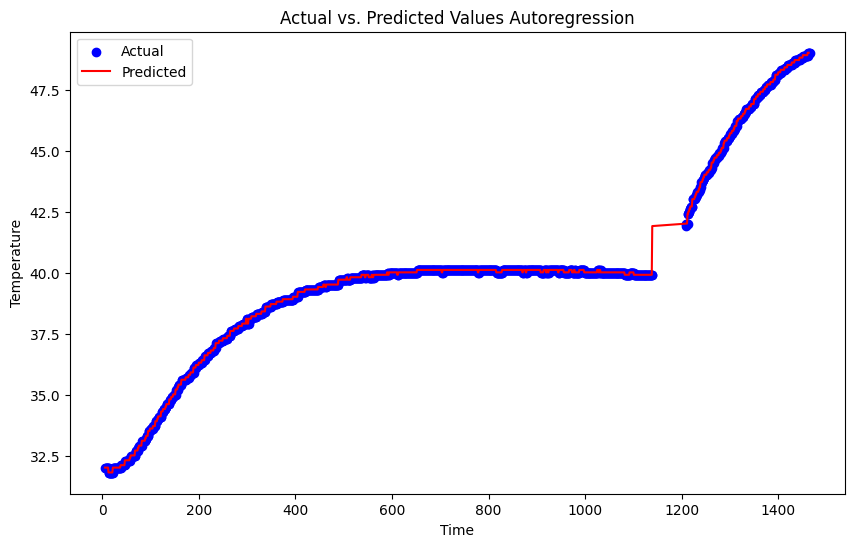

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))

# Scatter plot of actual values
plt.scatter(data['time'], data['temperature'], label='Actual', color='blue')

# Line plot of predicted values
predicted_values = results.predict(X)

# Make sure 'time' and predicted values have the same length
min_length = min(len(data['time']), len(predicted_values))
plt.plot(data['time'][:min_length], predicted_values[:min_length], label='Predicted', color='red')

plt.title('Actual vs. Predicted Values Autoregression')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


## Logarithmic Fit

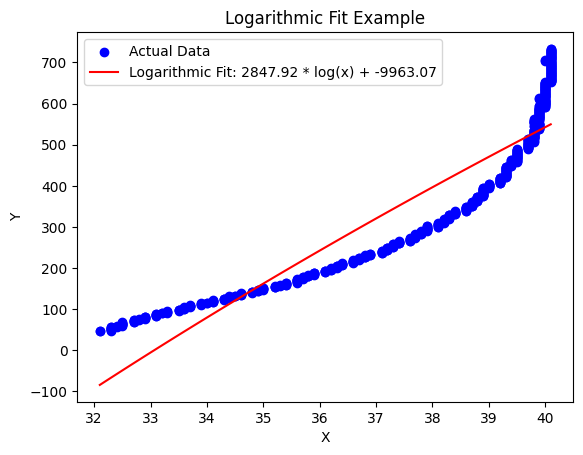

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Read data from Excel file (replace 'your_dataset.xlsx' with the actual path)
data = pd.read_excel('part1(1).xlsx')

# Assuming 'x' is the independent variable and 'y' is the dependent variable
x = data['temperature']
y = data['time']

# Define the logarithmic function
def logarithmic_function(x, a, b):
    return a * np.log(x) + b

# Fit the data to the logarithmic function
params, covariance = curve_fit(logarithmic_function, x, y)

# Extract the fitted parameters
a, b = params

# Generate the fitted curve
x_fit = np.linspace(min(x), max(x), 100)
y_fit = logarithmic_function(x_fit, a, b)

# Plot the original data and the fitted logarithmic curve
plt.scatter(x, y, label='Actual Data', color='blue')
plt.plot(x_fit, y_fit, label=f'Logarithmic Fit: {a:.2f} * log(x) + {b:.2f}', color='red')

plt.title('Logarithmic Fit Example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


## Power Fit


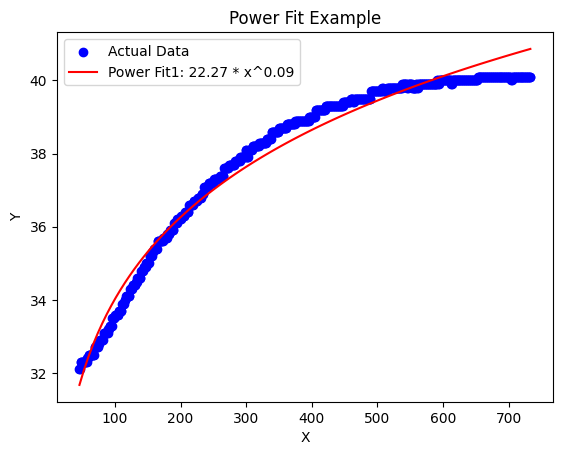

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
data1 = pd.read_excel('part1(1).xlsx')
data2 = pd.read_excel('part2.xlsx')

# Generate sample data
x = data1['time']
y = data1['temperature']  # Replace with your actual data

# Define the power function
def power_function(x, a, b):
    return a * np.power(x, b)

# Fit the data to the power function
params, covariance = curve_fit(power_function, x, y, p0=(25, .05))


# Extract the fitted parameters
a, b = params

# Generate the fitted curve
x_fit1 = np.linspace(min(x), max(x), 100)
y_fit1 = power_function(x_fit1, a, b)

# Plot the original data and the fitted curve
plt.scatter(x, y, label='Actual Data', color='blue')
plt.plot(x_fit1, y_fit1, label=f'Power Fit1: {a:.2f} * x^{b:.2f}', color='red')
plt.title('Power Fit Example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


## Polynomial Fit

#### Degree 3

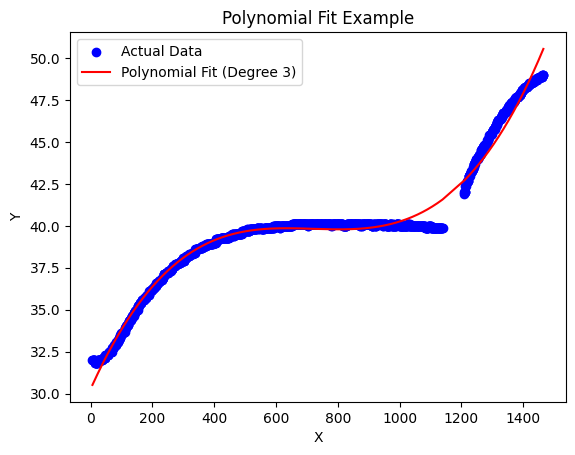

Polynomial Coefficients (Degree 3):
  Coefficient of x^0: 30.2701
  Coefficient of x^1: 0.0410
  Coefficient of x^2: -0.0001
  Coefficient of x^3: 0.0000


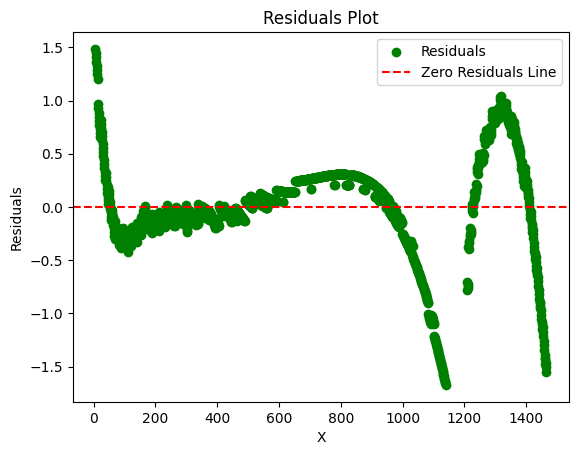

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from Excel file (replace 'your_dataset.xlsx' with the actual path)
data = pd.read_excel('cleaned_data.xlsx')

# Assuming 'x' is the independent variable and 'y' is the dependent variable
x = data['time']
y = data['temperature']

# Choose the degree of the polynomial (e.g., degree=2 for a quadratic polynomial)
degree = 3

# Fit a polynomial curve
coefficients = np.polyfit(x, y, degree)
poly_fit = np.poly1d(coefficients)

# Generate y values for the fitted curve
y_fit = poly_fit(x)

# Plot the original data and the fitted polynomial curve
plt.scatter(x, y, label='Actual Data', color='blue')
plt.plot(x, y_fit, label=f'Polynomial Fit (Degree {degree})', color='red')

plt.title('Polynomial Fit Example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
print(f'Polynomial Coefficients (Degree {degree}):')
for i, coef in enumerate(reversed(coefficients)):
    print(f'  Coefficient of x^{i}: {coef:.4f}')


residuals = y - y_fit
plt.scatter(x, residuals, label='Residuals', color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals Line')
plt.title('Residuals Plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.legend()
plt.show()


#### Degree 5


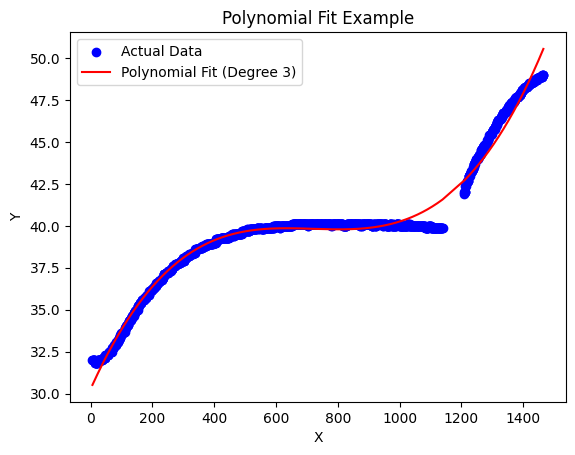

Polynomial Coefficients (Degree 3):
  Coefficient of x^0: 30.2701
  Coefficient of x^1: 0.0410
  Coefficient of x^2: -0.0001
  Coefficient of x^3: 0.0000


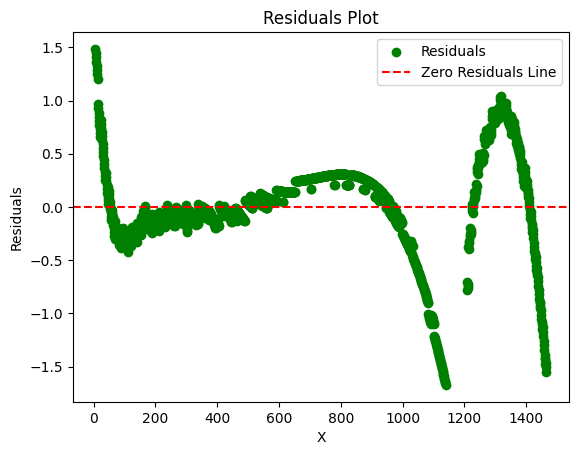

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from Excel file (replace 'your_dataset.xlsx' with the actual path)
data = pd.read_excel('cleaned_data.xlsx')

# Assuming 'x' is the independent variable and 'y' is the dependent variable
x = data['time']
y = data['temperature']

# Choose the degree of the polynomial (e.g., degree=2 for a quadratic polynomial)
degree = 3

# Fit a polynomial curve
coefficients = np.polyfit(x, y, degree)
poly_fit = np.poly1d(coefficients)

# Generate y values for the fitted curve
y_fit = poly_fit(x)

# Plot the original data and the fitted polynomial curve
plt.scatter(x, y, label='Actual Data', color='blue')
plt.plot(x, y_fit, label=f'Polynomial Fit (Degree {degree})', color='red')

plt.title('Polynomial Fit Example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
print(f'Polynomial Coefficients (Degree {degree}):')
for i, coef in enumerate(reversed(coefficients)):
    print(f'  Coefficient of x^{i}: {coef:.4f}')


residuals = y - y_fit
plt.scatter(x, residuals, label='Residuals', color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals Line')
plt.title('Residuals Plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.legend()
plt.show()

#### Degree 7

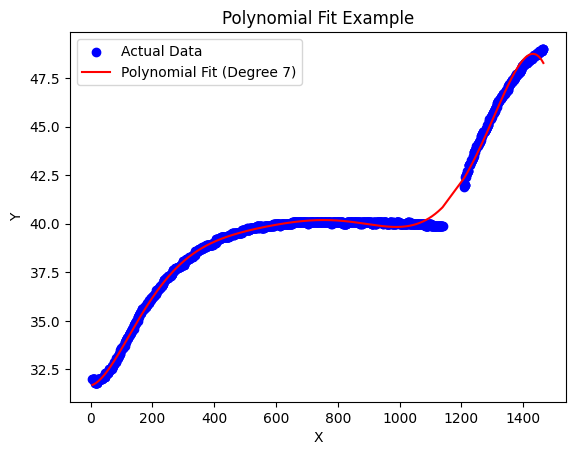

Polynomial Coefficients (Degree 7):
  Coefficient of x^0: 31.6761
  Coefficient of x^1: 0.0034
  Coefficient of x^2: 0.0002
  Coefficient of x^3: -0.0000
  Coefficient of x^4: 0.0000
  Coefficient of x^5: -0.0000
  Coefficient of x^6: 0.0000
  Coefficient of x^7: -0.0000


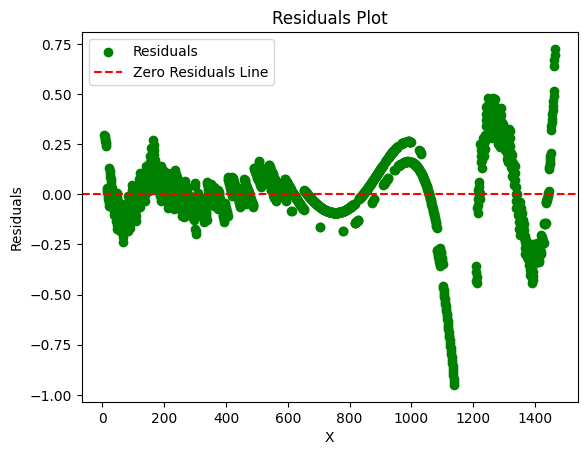

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from Excel file (replace 'your_dataset.xlsx' with the actual path)
data = pd.read_excel('cleaned_data.xlsx')

# Assuming 'x' is the independent variable and 'y' is the dependent variable
x = data['time']
y = data['temperature']

# Choose the degree of the polynomial (e.g., degree=2 for a quadratic polynomial)
degree = 7

# Fit a polynomial curve
coefficients = np.polyfit(x, y, degree)
poly_fit = np.poly1d(coefficients)

# Generate y values for the fitted curve
y_fit = poly_fit(x)

# Plot the original data and the fitted polynomial curve
plt.scatter(x, y, label='Actual Data', color='blue')
plt.plot(x, y_fit, label=f'Polynomial Fit (Degree {degree})', color='red')

plt.title('Polynomial Fit Example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
print(f'Polynomial Coefficients (Degree {degree}):')
for i, coef in enumerate(reversed(coefficients)):
    print(f'  Coefficient of x^{i}: {coef:.4f}')


residuals = y - y_fit
plt.scatter(x, residuals, label='Residuals', color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals Line')
plt.title('Residuals Plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.legend()
plt.show()

#### Degree 9

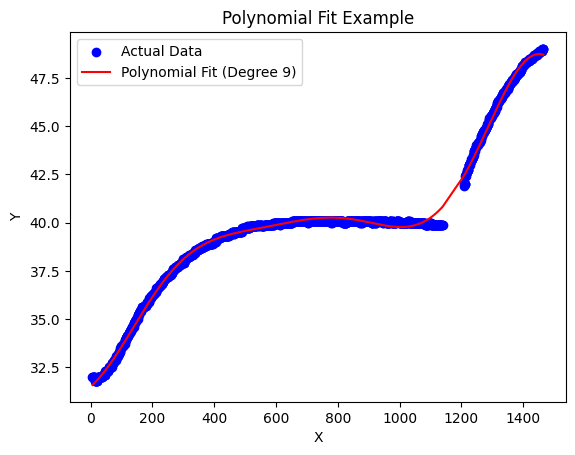

Polynomial Coefficients (Degree 9):
  Coefficient of x^0: 31.4968
  Coefficient of x^1: 0.0147
  Coefficient of x^2: 0.0001
  Coefficient of x^3: 0.0000
  Coefficient of x^4: -0.0000
  Coefficient of x^5: 0.0000
  Coefficient of x^6: -0.0000
  Coefficient of x^7: 0.0000
  Coefficient of x^8: -0.0000
  Coefficient of x^9: 0.0000


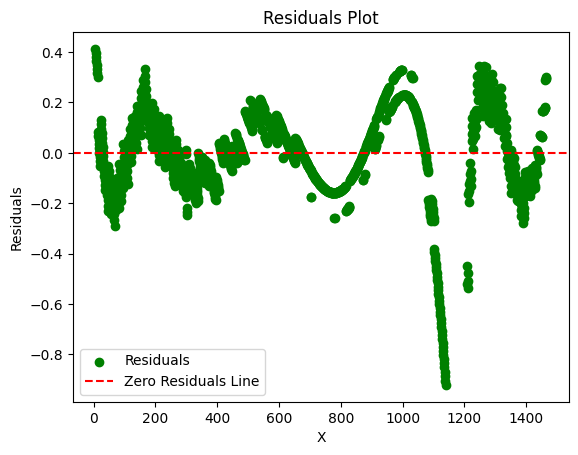

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from Excel file (replace 'your_dataset.xlsx' with the actual path)
data = pd.read_excel('cleaned_data.xlsx')

# Assuming 'x' is the independent variable and 'y' is the dependent variable
x = data['time']
y = data['temperature']

# Choose the degree of the polynomial (e.g., degree=2 for a quadratic polynomial)
degree = 9

# Fit a polynomial curve
coefficients = np.polyfit(x, y, degree)
poly_fit = np.poly1d(coefficients)

# Generate y values for the fitted curve
y_fit = poly_fit(x)

# Plot the original data and the fitted polynomial curve
plt.scatter(x, y, label='Actual Data', color='blue')
plt.plot(x, y_fit, label=f'Polynomial Fit (Degree {degree})', color='red')

plt.title('Polynomial Fit Example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
print(f'Polynomial Coefficients (Degree {degree}):')
for i, coef in enumerate(reversed(coefficients)):
    print(f'  Coefficient of x^{i}: {coef:.4f}')


residuals = y - y_fit
plt.scatter(x, residuals, label='Residuals', color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals Line')
plt.title('Residuals Plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.legend()
plt.show()

#### Degree 11

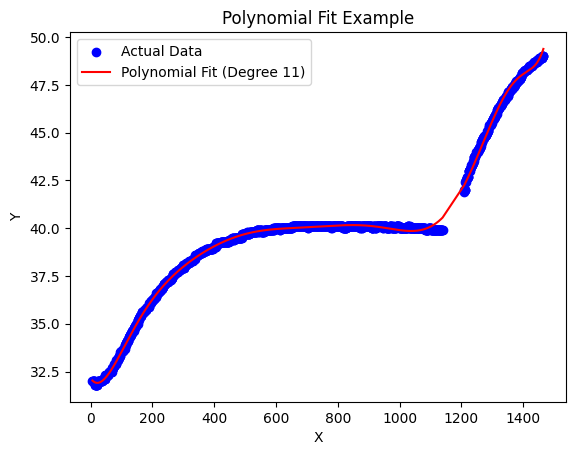

Polynomial Coefficients (Degree 11):
  Coefficient of x^0: 32.1499
  Coefficient of x^1: -0.0243
  Coefficient of x^2: 0.0007
  Coefficient of x^3: -0.0000
  Coefficient of x^4: 0.0000
  Coefficient of x^5: -0.0000
  Coefficient of x^6: 0.0000
  Coefficient of x^7: 0.0000
  Coefficient of x^8: -0.0000
  Coefficient of x^9: 0.0000
  Coefficient of x^10: -0.0000
  Coefficient of x^11: 0.0000


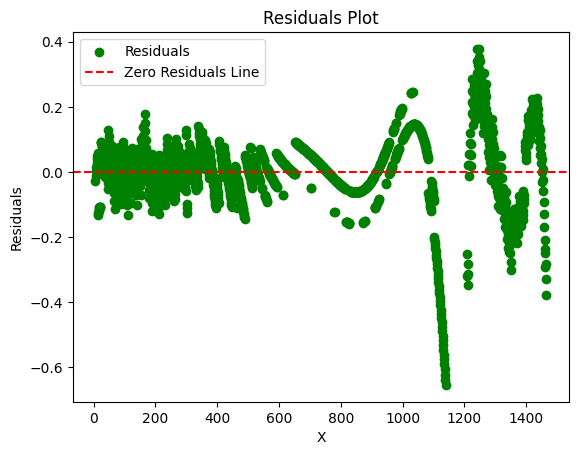

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from Excel file (replace 'your_dataset.xlsx' with the actual path)
data = pd.read_excel('cleaned_data.xlsx')

# Assuming 'x' is the independent variable and 'y' is the dependent variable
x = data['time']
y = data['temperature']

# Choose the degree of the polynomial (e.g., degree=2 for a quadratic polynomial)
degree = 11

# Fit a polynomial curve
coefficients = np.polyfit(x, y, degree)
poly_fit = np.poly1d(coefficients)

# Generate y values for the fitted curve
y_fit = poly_fit(x)

# Plot the original data and the fitted polynomial curve
plt.scatter(x, y, label='Actual Data', color='blue')
plt.plot(x, y_fit, label=f'Polynomial Fit (Degree {degree})', color='red')

plt.title('Polynomial Fit Example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
print(f'Polynomial Coefficients (Degree {degree}):')
for i, coef in enumerate(reversed(coefficients)):
    print(f'  Coefficient of x^{i}: {coef:.4f}')


residuals = y - y_fit
plt.scatter(x, residuals, label='Residuals', color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals Line')
plt.title('Residuals Plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.legend()
plt.show()

## Polynomial with 1/2 Dataset

#### First Half

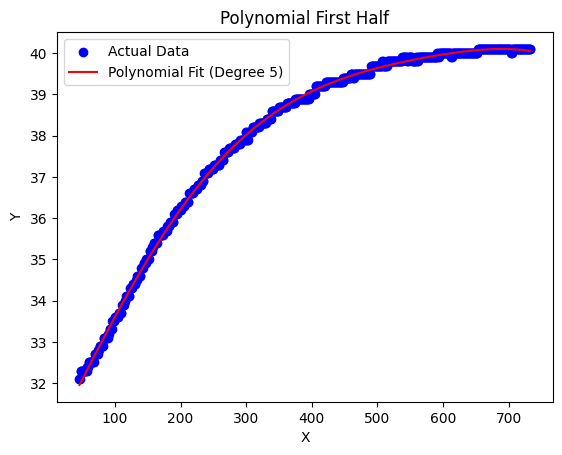

Polynomial Coefficients (Degree 5):
  Coefficient of x^0: 30.5316
  Coefficient of x^1: 0.0303
  Coefficient of x^2: 0.0000
  Coefficient of x^3: -0.0000
  Coefficient of x^4: 0.0000
  Coefficient of x^5: -0.0000


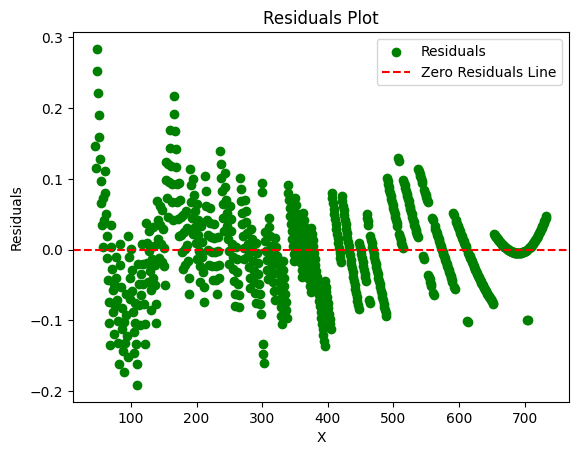

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from Excel file (replace 'your_dataset.xlsx' with the actual path)
data = pd.read_excel('part1(1).xlsx')

# Assuming 'x' is the independent variable and 'y' is the dependent variable
x = data['time']
y = data['temperature']

# Choose the degree of the polynomial (e.g., degree=2 for a quadratic polynomial)
degree = 5

# Fit a polynomial curve
coefficients = np.polyfit(x, y, degree)
poly_fit = np.poly1d(coefficients)

# Generate y values for the fitted curve
y_fit = poly_fit(x)

# Plot the original data and the fitted polynomial curve
plt.scatter(x, y, label='Actual Data', color='blue')
plt.plot(x, y_fit, label=f'Polynomial Fit (Degree {degree})', color='red')

plt.title('Polynomial First Half')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
print(f'Polynomial Coefficients (Degree {degree}):')
for i, coef in enumerate(reversed(coefficients)):
    print(f'  Coefficient of x^{i}: {coef:.4f}')


residuals = y - y_fit
plt.scatter(x, residuals, label='Residuals', color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals Line')
plt.title('Residuals Plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.legend()
plt.show()

#### Second Half

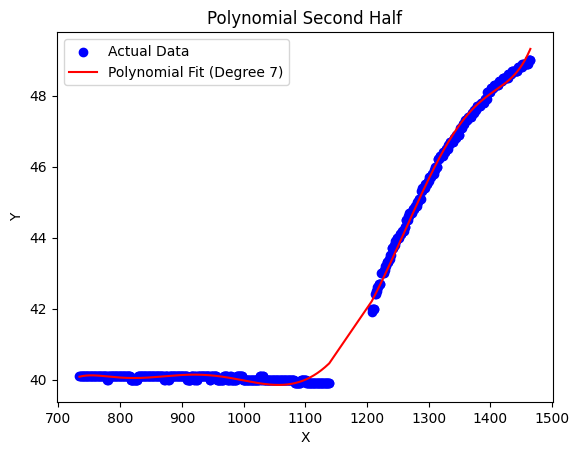

Polynomial Coefficients (Degree 7):
  Coefficient of x^0: -16370.3438
  Coefficient of x^1: 115.8804
  Coefficient of x^2: -0.3469
  Coefficient of x^3: 0.0006
  Coefficient of x^4: -0.0000
  Coefficient of x^5: 0.0000
  Coefficient of x^6: -0.0000
  Coefficient of x^7: 0.0000


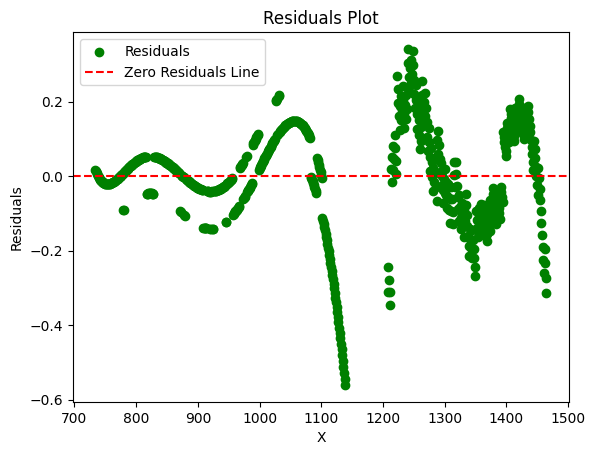

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from Excel file (replace 'your_dataset.xlsx' with the actual path)
data = pd.read_excel('part2.xlsx')

# Assuming 'x' is the independent variable and 'y' is the dependent variable
x = data['time']
y = data['temperature']

# Choose the degree of the polynomial (e.g., degree=2 for a quadratic polynomial)
degree = 7

# Fit a polynomial curve
coefficients = np.polyfit(x, y, degree)
poly_fit = np.poly1d(coefficients)

# Generate y values for the fitted curve
y_fit = poly_fit(x)

# Plot the original data and the fitted polynomial curve
plt.scatter(x, y, label='Actual Data', color='blue')
plt.plot(x, y_fit, label=f'Polynomial Fit (Degree {degree})', color='red')

plt.title('Polynomial Second Half')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
print(f'Polynomial Coefficients (Degree {degree}):')
for i, coef in enumerate(reversed(coefficients)):
    print(f'  Coefficient of x^{i}: {coef:.4f}')


residuals = y - y_fit
plt.scatter(x, residuals, label='Residuals', color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals Line')
plt.title('Residuals Plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.legend()
plt.show()